# Load the data

In [20]:
import pandas as pd
import numpy as np
complete_listings = pd.read_csv("listings.csv")

complete_listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20220924142144,2022-09-24,previous scrape,Copenhagen 'N Livin',Lovely apartment located in the hip Nørrebro a...,"Nice bars and cozy cafes just minutes away, ye...",https://a0.muscache.com/pictures/42044170/f63c...,16774,https://www.airbnb.com/users/show/16774,Simon,2009-05-12,"Copenhagen, Denmark",I'm currently working as an environmental cons...,within a few hours,100%,58%,f,https://a0.muscache.com/im/users/16774/profile...,https://a0.muscache.com/im/users/16774/profile...,Nørrebro,1.0,1.0,"['email', 'phone']",t,f,"Copenhagen, Hovedstaden, Denmark",Nrrebro,NaN,55.686410,12.547410,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Stove"", ""Coffee maker"", ""Drying rack for clo...",$898.00,3,15,3.0,3.0,15.0,15.0,3.0,15.0,NaN,t,0,0,0,0,2022-09-24,172,4,0,2009-09-04,2022-06-21,4.78,4.79,4.78,4.86,4.89,4.73,4.71,NaN,f,1,1,0,0,1.08
1,26057,https://www.airbnb.com/rooms/26057,20220924142144,2022-09-25,city scrape,Lovely house - most attractive area,Our lovely house in the center of the city is ...,The neighborhood is the most famous one and th...,https://a0.muscache.com/pictures/miso/Hosting-...,109777,https://www.airbnb.com/users/show/109777,Kari,2010-04-17,"Copenhagen, Denmark","We are a family with 2 children, and living in...",within a few hours,100%,31%,f,https://a0.muscache.com/im/users/109777/profil...,https://a0.muscache.com/im/users/109777/profil...,Indre By,2.0,3.0,"['email', 'phone']",t,t,"Copenhagen, Hovedstaden, Denmark",Indre By,NaN,55.693070,12.576490,Entire home,Entire home/apt,6,NaN,1.5 baths,4.0,4.0,"[""Stove"", ""Long term stays allowed"", ""High cha...","$2,600.00",4,1125,4.0,4.0,1125.0,1125.0,4.0,1125.0,NaN,t,4,16,30,303,2022-09-25,59,8,0,2013-12-02,2022-08-09,4.91,4.93,4.96,4.93,4.86,4.94,4.81,NaN,f,1,1,0,0,0.55
2,26473,https://www.airbnb.com/rooms/26473,20220924142144,2022-09-25,city scrape,City Centre Townhouse Sleeps 1-10 persons,GUESTHOUSE ON KNABROSTRÆDE - located in the ab...,NaN,https://a0.muscache.com/pictures/8e132ba0-b68c...,112210,https://www.airbnb.com/users/show/112210,Julia,2010-04-22,"Copenhagen, Denmark","Active young woman, started as an expat in Cop...",within an hour,100%,95%,f,https://a0.muscache.com/im/pictures/user/8a185...,https://a0.muscache.com/im/pictures/user/8a185...,Indre By,6.0,23.0,"['email', 'phone', 'work_email']",t,t,NaN,Indre By,NaN,55.676020,12.575400,Entire townhouse,Entire home/apt,11,NaN,2 baths,6.0,5.0,"[""Wifi"", ""Stove"", ""Dishes and silverware"", ""Co...","$3,250.00",3,31,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,11,32,55,56,2022-09-25,300,7,2,2010-10-14,2022-09-10,4.53,4.63,4.44,4.78,4.70,4.89,4.59,NaN,f,3,3,0,0,2.06
3

### 1) Keep only the relevant columns

In [21]:
relevant_listings = complete_listings[[
    'id',
    'name',
    'host_id',
    'host_name',
    'neighbourhood_cleansed', 
    'latitude',
    'longitude',
    'room_type',  
    'price',
    'minimum_nights',
    'number_of_reviews',  
    'last_review',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',  
    'review_scores_checkin',
    'review_scores_communication',  
    'review_scores_location',  
    'review_scores_value',  
    'reviews_per_month',
    'calculated_host_listings_count',  
    'availability_365'
]]

relevant_listings

# Remove any rows where number of reviews == 0
relevant_listings = relevant_listings[relevant_listings['number_of_reviews'] != 0]

relevant_listings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Remove any rows that contain not defined entries in them
relevant_listings = relevant_listings.dropna()
# relevant_listings


### 3) Fix neighborhood_cleansed

In [22]:
# Define the exchange rate (1 USD to DKK)
exchange_rate_usd_to_dkk = 6.95

# Define a conversion function to convert USD to DKK
def convert_usd_to_dkk(price_usd):
    price_dkk = round(price_usd * exchange_rate_usd_to_dkk, 4)
    price_dkk_str = price_dkk
    return price_dkk_str

# define the mapping table
mapping_table = str.maketrans({'$': '', ',': ''})

pd.set_option('display.max_rows', 0)
pd.set_option('display.max_columns', 0)

# Apply the conversion function to the 'price' column
relevant_listings['price'] = relevant_listings['price'].apply(lambda x: x.translate(mapping_table)).apply(pd.to_numeric).apply(convert_usd_to_dkk)#.apply(lambda x: x*exchange_rate_usd_to_dkk).apply(lambda x: str(x)+ "dkk")
relevant_listings

neighborhood_dictionary = {
    'Nrrebro': 'Nørrebro',
    'Indre By' : 'Indre By',
    'Vesterbro-Kongens Enghave' : 'Vesterbro-Kongens Enghave',
    'sterbro' : 'Østerbro',
    'Amager Vest' : 'Amager Vest',
    'Frederiksberg' : 'Frederiksberg',
    'Amager st' : 'Amager Øst',
    'Valby' : 'Valby',
    'Bispebjerg' : 'Bispebjerg',
    'Vanlse' : 'Vanløse',
    'Brnshj-Husum' : 'Brønshøj-Husum'
}

relevant_listings['neighbourhood_cleansed'] = relevant_listings['neighbourhood_cleansed'].apply(lambda x: neighborhood_dictionary[x])

relevant_listings

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,6241.10,3,172,2022-06-21,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,18070.00,4,59,2022-08-09,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,22587.50,3,300,2022-09-10,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,5038.75,7,24,2022-08-04,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,13580.30,3,19,2022-08-22,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0
5,32379,"165 m2 artist flat on Vesterbro, with 2 bathr...",140105,Lise,Vesterbro-Kongens Enghave,55.672638,12.552493,Entire home/apt,8896.00,3,80,2022-08-13,4.90,4.96,4.92,4.88,4.91,4.88,4.72,0.54,2,60
6,32841,Cozy flat for Adults/Quiet for kids,142143,Anders & Maria,Østerbro,55.711760,12.570910,Entire home/apt,4288.15,100,7,2016-09-15,4.57,4.75,4.50,5.00,5.00,4.50,4.50,0.05,1,281
7,33680,Best location on Vesterbro/Cph,145671,Mette,Vesterbro-Kongens Enghave,55.666310,12.545550,Entire home/apt,6950.00,6,71,2019-03-14,4.74,4.75,4.67,4.91,4.91,4.80,4.67,0.48,1,312
8,37159,Unique space on greatest location,160390,Jeanette,Indre By,55.685470,12.565430,Entire home/apt,20266.20,5,11,2017-08-22,5.00,4.78,5.00,5.00,5.00,4.89,4.78,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# We use a predefined stop word list from nltk library, with common unnecessary english words
stop_words = stopwords.words('english')

# Since the names can contain danish words, we extend the stop word list with danish words
stop_words.extend(stopwords.words('danish'))

# We cleanse even further by removing any occurrences of the neighborhood since we have a dedicated column for it
stop_words.extend(relevant_listings['neighbourhood_cleansed'].apply(lambda x: str.lower(x)).unique().tolist())

# Some extra words which don't provide meaningful description
stop_words.extend(['copenhagen', 'apartment', 'lejlighed', 'city'])

# Make the 'word cloud'
vect = CountVectorizer(max_features=5000, stop_words=stop_words)
X = vect.fit_transform(relevant_listings['name'])

feature_names = vect.get_feature_names_out()
word_frequencies = X.toarray().sum(axis=0)

# Create a DataFrame to display word frequencies
word_freq_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_frequencies})

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

word_freq_df

[nltk_data] Downloading package stopwords to /Users/owner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Word,Frequency
1059,cozy,1264
892,central,1188
2462,room,1136
2162,nørrebro,997
974,close,936
1044,cosy,882
1542,heart,869
677,balcony,776
889,center,743
917,charming,698


### Point 5)

In [77]:
# We use a predefined stop word list from nltk library, with common unnecessary english words
stop_words = stopwords.words('english')

# Since the names can contain danish words, we extend the stop word list with danish words
stop_words.extend(stopwords.words('danish'))

# Some extra words which don't provide meaningful description
stop_words.extend(['copenhagen', 'apartment', 'apartmentincopenhagen', 'lejlighed', 'city'])

# Make the 'word cloud'
vect = CountVectorizer(max_features=5000, stop_words=stop_words)
X = vect.fit_transform(relevant_listings['host_name'])

# Compute the frequencies of the words
word_frequencies = X.toarray().sum(axis=0)

feature_names = vect.get_feature_names_out()
# Create a DataFrame to display word frequencies
word_freq_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_frequencies})
# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

word_freq_df

,Word,Frequency
156,anne,199
1791,mette,167
1684,maria,160
1692,marie,158
461,christian,153
...,...,...
1098,ilsur,1
1097,ilona,1
1096,illuna,1
1095,iliyana,1


### 6)

In [82]:

# Define the bins
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, np.inf]
bin_labels = [
    '[0-1000]',
    '[1000-2000]',
    '[2000-3000]',
    '[3000-4000]',
    '[4000-5000]',
    '[5000-6000]',
    '[6000-7000]',
    '[7000-8000]',
    '[8000-9000]',
    '[9000-10000]',
    ' > 10000'
]

# bin the age column
relevant_listings['price_bin'] = pd.cut(relevant_listings['price'], bins=bins, labels=bin_labels)

relevant_listings


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_bin
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,6241.10,3,172,2022-06-21,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,[6000-7000]
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,18070.00,4,59,2022-08-09,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,> 10000
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,22587.50,3,300,2022-09-10,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,> 10000
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,5038.75,7,24,2022-08-04,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,[5000-6000]
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,13580.30,3,19,2022-08-22,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,> 10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,646726550705810749,Ny rummelig lejlighed med tilhørende kat.,54229471,Morten,Brønshøj-Husum,55.739028,12.487433,Entire home/apt,5949.20,6,4,2022-08-28,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85,1,0,[5000-6000]
13809,646941499450912133,Big beautiful and charming apartment,141288846,Tanja,Bispebjerg,55.730481,12.521243,Entire home/apt,7297.50,2,4,2022-09-04,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64,2,0,[7000-8000]
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Kathrine,Valby,55.667782,12.463285,Entire home/apt,3127.50,3,3,2022-07-21,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,1,0,[3000-4000]
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Tim,Valby,55.659536,12.474726,Entire home/apt,2780.00,1,3,2022-08-14,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,1,0,[2000-3000]


### 7)

TypeError: unhashable type: 'Series'

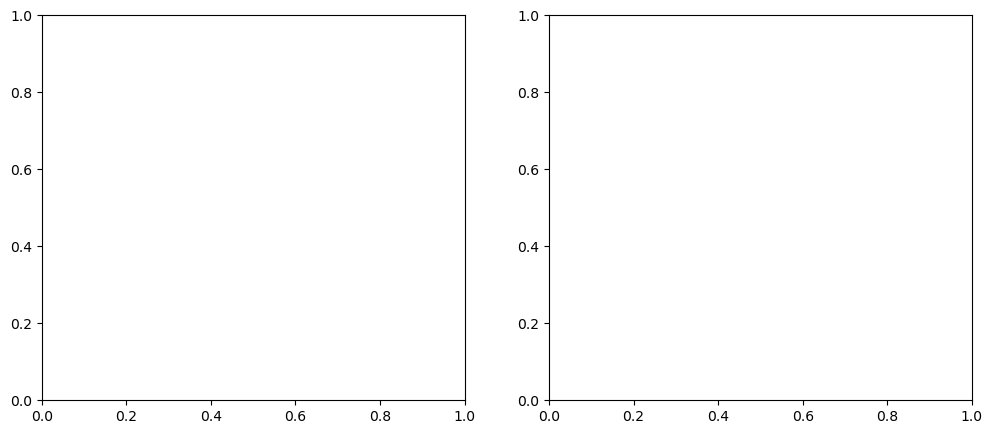

In [89]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

bin_colors = {
    '[0-1000]' : 'r',
    '[1000-2000]' : 'g',
    '[2000-3000]' : 'b',
    '[3000-4000]' : 'y',
    '[4000-5000]' : 'r',
    '[5000-6000]' : 'r',
    '[6000-7000]' : 'r',
    '[7000-8000]' : 'r',
    '[8000-9000]' : 'r',
    '[9000-10000]' : 'r',
    ' > 10000' : 'r'
}

ax1.scatter(relevant_listings['latitude'], relevant_listings['longitude'],
        color=bin_colors[relevant_listings['price_bin']],
        alpha=0.5,
        marker='o',
        s=50
        )

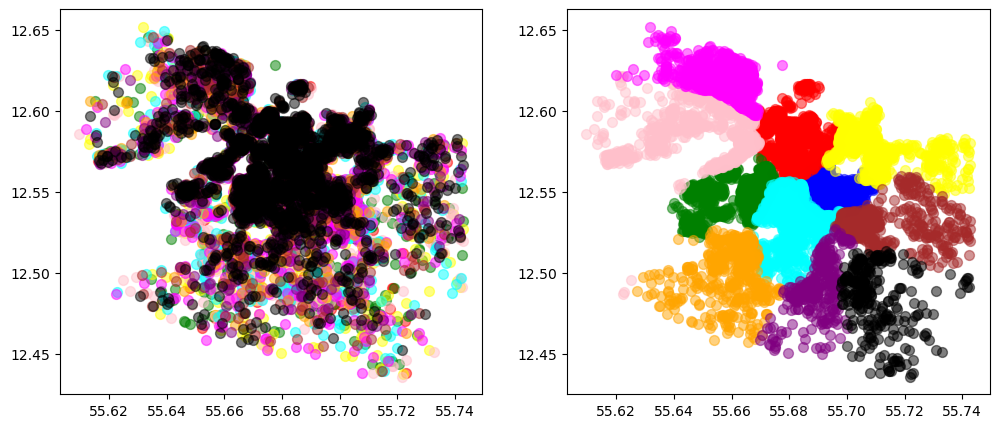

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

bin_colors = {
    '[0-1000]' : 'blue',
    '[1000-2000]' : 'red',
    '[2000-3000]' : 'green',
    '[3000-4000]' : 'yellow',
    '[4000-5000]' : 'pink',
    '[5000-6000]' : 'cyan',
    '[6000-7000]' : 'magenta',
    '[7000-8000]' : 'orange',
    '[8000-9000]' : 'brown',
    '[9000-10000]' : 'purple',
    ' > 10000' : 'black'
}

neighborhood_colors = {
    'Nørrebro' : 'blue',
    'Indre By' : 'red',
    'Vesterbro-Kongens Enghave' : 'green',
    'Østerbro' : 'yellow',
    'Amager Vest' : 'pink',
    'Frederiksberg' : 'cyan',
    'Amager Øst' : 'magenta',
    'Valby' : 'orange',
    'Bispebjerg' : 'brown',
    'Vanløse' : 'purple',
    'Brønshøj-Husum' : 'black'
}


for category, color in bin_colors.items():
    subset = relevant_listings[relevant_listings['price_bin'] == category]
    ax1.scatter(subset['latitude'], subset['longitude'],
                color=color,
                alpha=0.5,
                marker='o',
                s=50,
                label=category)
    
for category, color in neighborhood_colors.items():
    subset = relevant_listings[relevant_listings['neighbourhood_cleansed'] == category]
    ax2.scatter(subset['latitude'], subset['longitude'],
                color=color,
                alpha=0.5,
                marker='o',
                s=50,
                label=category)

### Point 8)

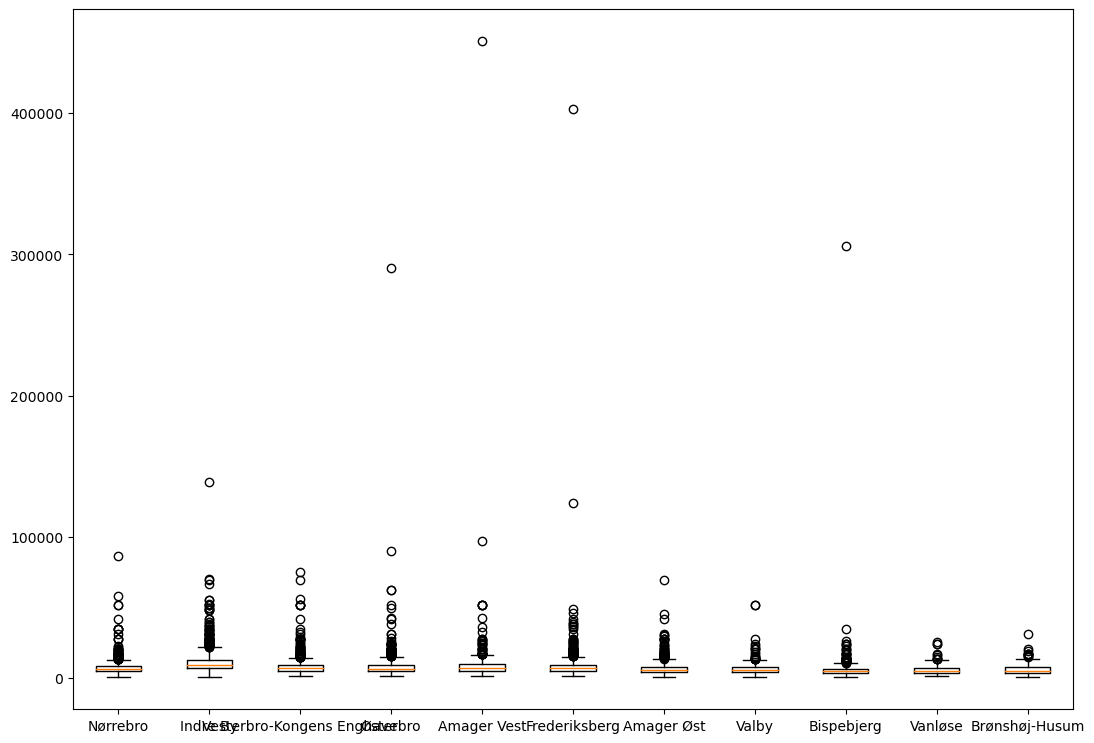

In [112]:
neighborhoods = [
    'Nørrebro',
    'Indre By',
    'Vesterbro-Kongens Enghave',
    'Østerbro',
    'Amager Vest',
    'Frederiksberg',
    'Amager Øst',
    'Valby',
    'Bispebjerg',
    'Vanløse',
    'Brønshøj-Husum'
]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

data = []

for category in neighborhoods:
    subset = relevant_listings[relevant_listings['neighbourhood_cleansed'] == category]
    data.append(subset['price'])
    
bp = plt.boxplot(data, labels=neighborhoods)
 
# show plot
plt.show()

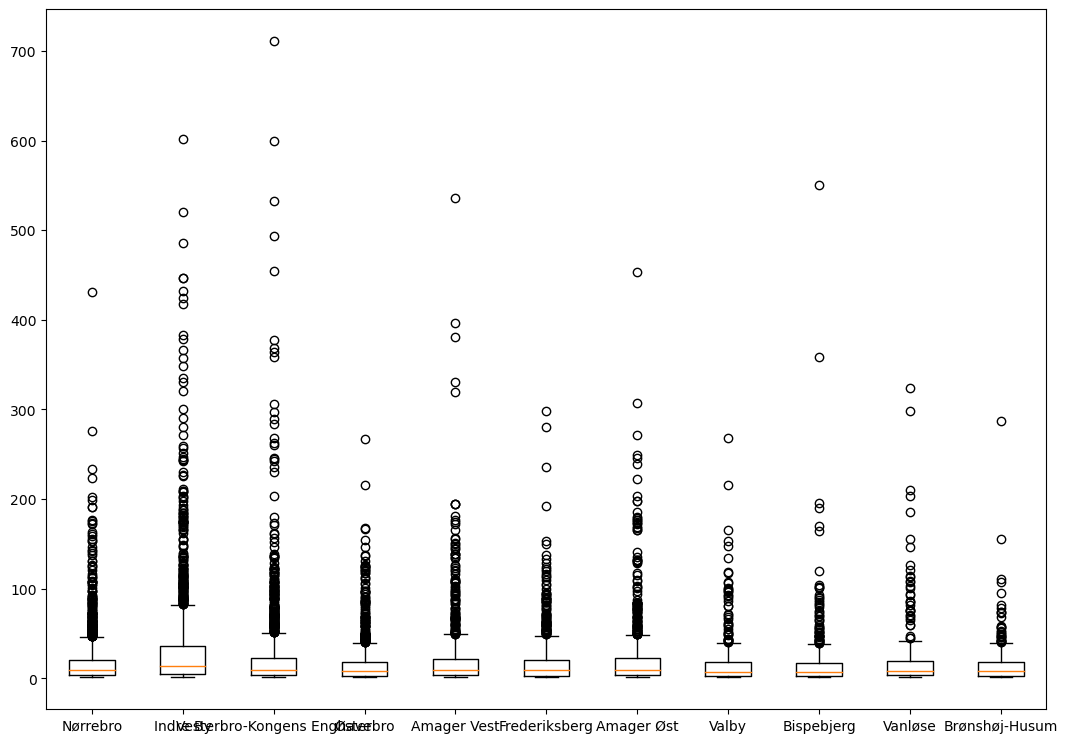

In [114]:
neighborhoods = [
    'Nørrebro',
    'Indre By',
    'Vesterbro-Kongens Enghave',
    'Østerbro',
    'Amager Vest',
    'Frederiksberg',
    'Amager Øst',
    'Valby',
    'Bispebjerg',
    'Vanløse',
    'Brønshøj-Husum'
]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

data = []

for category in neighborhoods:
    subset = relevant_listings[relevant_listings['neighbourhood_cleansed'] == category]
    data.append(subset['number_of_reviews'])
    
bp = plt.boxplot(data, labels=neighborhoods)
 
# show plot
plt.show()

## Point 9)

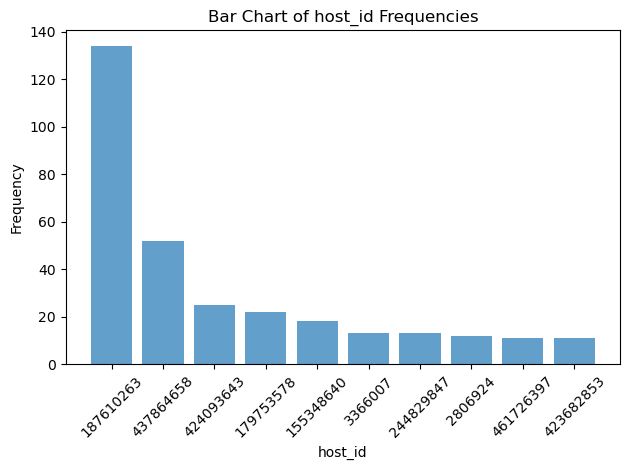

In [134]:
top_10_entries = relevant_listings['host_id'].value_counts().head(10)


x = [str(host_id) for host_id in top_10_entries.index]
y = list(top_10_entries.values)


# Create a bar chart
plt.bar(x, y, align='center', alpha=0.7)

# Add labels and title
plt.xlabel('host_id')
plt.ylabel('Frequency')
plt.title('Bar Chart of host_id Frequencies')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Ensures labels and title fit properly
plt.show()